In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from copy import copy

In [181]:
classes = ['Food','Culture','Nature','Sight Seeing','Museum','Store']

In [213]:
df = pd.read_csv('Hackaton2019/dataFrameAll_.csv')

In [214]:
df

,name,geo_location_lat,geo_location_lng,address,rating,type_of_the_attraction,place_id,local_phone_number,website,url
0,Jaffa Theatre,32.054766,34.754227,"Tayelet Mifraz Shlomo St 10, Yafo, Israel",4.3,"[point_of_interest, establishment]",ChIJO1BozbhMHRURt8-yLxgrefQ,03-518-5563,http://www.arab-hebrew-theatre.org.il/,https://maps.google.com/?cid=17616158800315862967
1,Habima Theatre,32.072587,34.778971,"Tarsat Ave 2, Tel Aviv-Yafo, Israel",4.5,"[point_of_interest, establishment]",ChIJE5WB74FLHRURMK_Pwxmtn-s,03-629-5555,https://www.habima.co.il/,https://maps.google.com/?cid=16978479446381014832
2,Gesher Theater,32.056084,34.760201,"Jerusalem Blvd 9, Tel Aviv-Yafo, Israel",4.6,"[point_of_interest, establishment]",ChIJ_Utvp71MHRURXEaMpPOZfws,03-515-7000,http://www.gesher-theatre.co.il/he/,https://maps.google.com/?cid=828550128176219740
3,Tzavta Theatre,32.075045,34.782012,"Shlomo Ibn Gabirol St 30, Yafo, Israel",4.1,"[point_of_interest, establishment]",ChIJ_w_RnYNLHRURvieQTvtl5nU,03-695-0156,http://www.tzavta.co.il/,https://maps.google.com/?cid=8495589877110286270
4,Tmu-na Theater,32.066355,34.787625,"Soncino St 8, Tel Aviv-Yafo, Israel",4.3,"[point_of_interest, establishment]",ChIJp69CAXdLHRURcCyLGNTlaQU,03-562-9462,http://www.tmu-na.org.il/,https://maps.google.com/?cid=390095541851860080
5,Yahalom Theatre,32.084849,34.802520,"בית ש.א.פ, היצירה 3, רמת גן, 5252141, Israel",4.1,"[point_of_interest, establishment]",ChIJ37RaW8dLHRUR3o3Eb8F3Abk,03-612-1050,https://www.ramat-gan.muni.il/theater/yalom/,https://maps.google.com/?cid=13331068044680924638
6,Theatre Club,32.055797,34.759524,"Jerusalem Blvd 10, Tel Aviv-Yafo, Israel",4.4,"[point_of_interest, establishment]",ChIJR_Xwsb1MHRURf73sYAmWVyk,03-518-4715,http://www.hateatron.co.il/,https://maps.google.com/?cid=2979014645553872255
7,Karov Theatre,32.056493,34.778922,"Levinsky 116, Tel Aviv-Yafo, Israel",4.3,"[point_of_interest, establishment]",ChIJIxr7p2ZLHRURUuSBF4QRy_I,03-688-5004,http://t-karov.co.il/,https://maps.google.com/?cid=17495096436478567506
8,Herzliya Municipal Theatre,32.166995,34.842440,"Ben Gurion Blvd 2, Herzliya, 4678502, Israel",4.2,"[point_of_interest, establishment]",ChIJ0eIHhAxIHRUR7lM-5QlW2fM,09-890-8000,https://business.google.com/u/9/edit/l/1251228...,https://maps.google.com/?cid=17571170021663462382
9,Cameri Theater,32.076749,34.784617,"Sderot Sha'ul HaMelech 19, Tel Aviv-Yafo, Israel",4.4,"[point_of_interest, establishment]",ChIJF8dPS5tLHRURZA_VUPaQ-mE,03-606-0900,http://www.cameri.co.il/,https://maps.google.com/?cid=7060114753449168740


In [198]:
# toy model
import random

n_loc = 160
my_class = []
test_loc_lng = np.random.rand(n_loc)
test_loc_lat = np.random.rand(n_loc)
loc = []
user_weights = []
rating = []
for k in classes:
    user_weights.append(np.random.uniform(0.,1.))
for i in range(n_loc):
    my_class.append(random.choice(classes))
    rating.append(np.random.uniform(3,5))

In [200]:
df = pd.DataFrame()
df['type'] = my_class
df['lng'] = test_loc_lng
df['lat'] = test_loc_lat
df['rating'] = rating

In [201]:
df.head(10)

,type,lng,lat,rating
0,Sight Seeing,0.775025,0.728190,4.091900
1,Store,0.232040,0.002452,3.775835
2,Food,0.644249,0.189868,4.211828
3,Nature,0.963834,0.523863,4.906398
4,Nature,0.539159,0.286099,4.083652
5,Museum,0.189426,0.508388,3.528618
6,Culture,0.547323,0.927845,4.330760
7,Nature,0.913286,0.379976,3.187616
8,Store,0.271483,0.732006,4.543719
9,Food,0.826921,0.617274,4.905919


In [202]:
df_food = df[df['type'] == 'Food']

In [203]:
df_food

,type,lng,lat,rating
2,Food,0.644249,0.189868,4.211828
9,Food,0.826921,0.617274,4.905919
10,Food,0.303535,0.072471,4.688517
14,Food,0.639695,0.487466,4.357702
15,Food,0.374452,0.622596,4.669826
24,Food,0.672953,0.328260,4.984937
27,Food,0.647295,0.349177,3.570535
28,Food,0.866804,0.228515,4.808081
35,Food,0.715341,0.381631,3.451179
36,Food,0.282165,0.603378,4.698315


In [204]:
user_opt = {'Food': True,'Culture': 0.1,'Nature':0.25,'Sight Seeing':0.15,'Museum':0.1,'Store':0.4}

In [205]:
user_opt

{'Food': True,
 'Culture': 0.1,
 'Nature': 0.25,
 'Sight Seeing': 0.15,
 'Museum': 0.1,
 'Store': 0.4}

In [206]:
loc_df = df[df.type!='Food']
food_df = df[df.type=='Food']

In [207]:
food_df.iloc[[1,4,3]]

,type,lng,lat,rating
9,Food,0.826921,0.617274,4.905919
15,Food,0.374452,0.622596,4.669826
14,Food,0.639695,0.487466,4.357702


In [208]:
class route:
    
    part1 = []
    part2 = []
    
    food = []
    
    def get_route_no_dist(self):
        return pd.concat([self.part1,self.food,self.part2])
    
    def compute_distances(self,startpoint):
        r = self.get_route_no_dist()
        
        x = r.lng.values
        y = r.lat.values
        distances = []
        for i in range(len(r)):
            if i==0:
                dist = np.sqrt( (x[i]-startpoint[0])**2+(y[i]-startpoint[1])**2 )
            else:
                dist = np.sqrt( (x[i]-x[i-1])**2+(y[i]-y[i-1])**2 )
            distances.append(dist)
        return distances
    
    def get_route(self,startpoint):
        r = self.get_route_no_dist()
        distances = self.compute_distances(startpoint)
        r['distances'] = distances
        return r
    def route_score(self, startpoint, class_weights):
        score = 0
        r = self.get_route(startpoint)
        
        for i in range(len(r)):
            
            c_weight = float(class_weights[r.iloc[i].type])
            
            score_i = ((r.iloc[i].rating)/(r.iloc[i].distances))*c_weight
            score+=score_i
            
        return score
        
def generate_route(locations,add_food,food_locations):
    
    r = route()
    
    part1_len = np.random.randint(1,3)
    part2_len = np.random.randint(1,3)
    
    track = np.random.choice(range(len(locations)),part1_len+part2_len,replace=False)
    
    r.part1 = locations.iloc[ track[:part1_len] ]
    r.part2 = locations.iloc[ track[part1_len:] ]
    
    if add_food:
        food_idx = np.random.choice(range(len(food_locations)))
        r.food = food_locations.iloc[[food_idx]]
    
    return r

def generate_routes(n, locations,add_food,food_locations):
    
    routes = []
    for i in range(n):
        routes.append( generate_route(locations,add_food,food_locations) )
    return routes

def pick_1outof2(s1,s2):
    
    rand_n = np.random.rand()
    
    thresh = s1/(s1+s2)
    
    if rand_n > thresh:
        return 1
    else:
        return 0

def create_child(r1,score1,r2,score2):
    
    child = route()
    
    parents = [r1,r2]
    
    is_food = len(r1.food)
    if is_food:
        which_food = pick_1outof2(score1,score2)
        child.food = parents[which_food].food
    
    
    part1_parent = pick_1outof2(score1,score2)
    part2_parent = pick_1outof2(score1,score2)
    
    child.part1 = parents[part1_parent].part1
    child.part2 = parents[part2_parent].part2
    
    return child
    
def check_child(child):
    start = [-1,1]
    r = child.get_route(start)
    if 0.0 in r.distances.values:
        return False
    else:
        return True
    
def mate_parents(r_list,startpoint,class_weights):
    
    children = []
    
    alpha = r_list[0]
    score1 = alpha.route_score(startpoint,class_weights)
    
    for par_i in range(1,len(r_list)):
        beta = r_list[par_i]
        score2 = beta.route_score(startpoint,class_weights)
        
        child = create_child(alpha,score1,beta,score2)
        if check_child(child):
            children.append(child)
        else:
            child = create_child(alpha,score1,beta,score2)
            if check_child(child):
                children.append(child)
    return children
    

In [209]:
def get_best_route(startingpoint, loc_df, food_df, do_food, class_weights):
    n_in_gen = 15
    n_top = 5
    n_generations = 50
    
    generation_record = []
    
    current_gen = generate_routes(n_in_gen, loc_df, do_food ,food_df)
    
    for gen_i in range(n_generations):
        scores = [ x.route_score(startingpoint, class_weights) for x in current_gen ]
        topscores = sorted(zip(current_gen,scores),key=lambda pair: pair[1])
        current_gen = [x for x,_ in topscores]
        generation_record.append(current_gen)
        
        best_ones = current_gen[-n_top:]
        
        children = mate_parents(best_ones,startingpoint,class_weights)
        n_children = len(children)
        
        new_blood = []
        if n_in_gen-n_top-n_children > 0:
            new_blood = generate_routes(n_in_gen-n_top-n_children, loc_df, do_food ,food_df)
        current_gen = best_ones+children+new_blood
        
        
        
        
    scores = [ x.route_score(startingpoint, class_weights) for x in current_gen ]
    topscores = sorted(zip(current_gen,scores),key=lambda pair: pair[1])[-1]
    best_one = topscores
    
    return best_one,generation_record

In [210]:
%%time
best_one,generation_record = get_best_route(startingpoint=[0,0], loc_df=loc_df, food_df=food_df, do_food=True, class_weights=user_opt)

CPU times: user 3.45 s, sys: 15.1 ms, total: 3.47 s
Wall time: 3.49 s


In [176]:
def plot_route(start,r,ax):
    
    x = r.get_route(start).lng
    y = r.get_route(start).lat
    x = [start[0]]+list(x)
    y = [start[1]]+list(y)
    
    ax.plot(x,y)

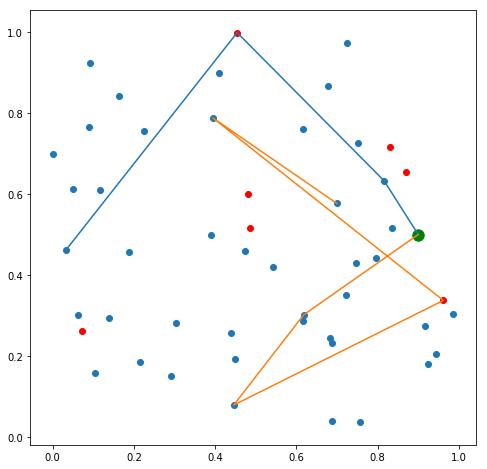

In [177]:


fig,ax = plt.subplots(figsize=(8,8))

start = [0.9,0.5]


r_list = generate_routes(2,loc_df,True,food_df)

ax.scatter(loc_df.lng,loc_df.lat)
ax.scatter(food_df.lng,food_df.lat,c='r')

for r in r_list:
    plot_route(start,r,ax)
ax.scatter(start[0],start[1],s=130,c='g')
plt.show()

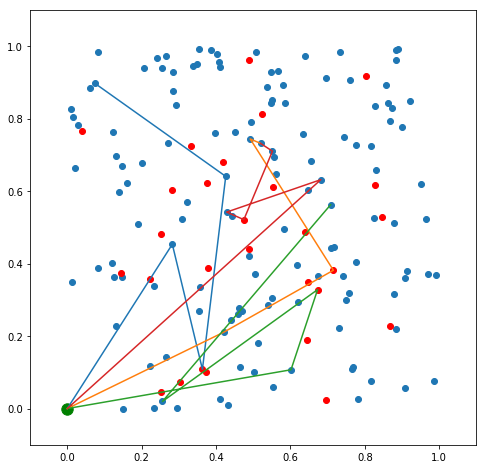

In [211]:
import matplotlib
t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots(figsize=(8,8))

start = [0,0]




def animate(i):
    ax.clear()
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)
    ax.scatter(loc_df.lng,loc_df.lat)
    ax.scatter(food_df.lng,food_df.lat,c='r')
    r_list = generation_record[i] #generate_routes(12,loc_df,True,food_df)
    for r in r_list[-4:]:
        plot_route(start,r,ax)
    ax.scatter(start[0],start[1],s=130,c='g')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=20)

from IPython.display import HTML
HTML(ani.to_jshtml())